### The Goal of the Script is to perform:
Feature Engineering: Feature Scaling (Process of scaling the features in order to prevent algorithms from being affected is termed as Feature Scaling or Feature Normalization.)

### Approaches:
There are two techniques of scaling features:

**Normalization** - the values are rescaled to range between zero and one.
* Min-max scaling

**Standardization** - the values are rescaled to center around the mean with units of standard deviation.
* Standard scaling

Nice Read Blog - [Reference Link](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

Standard Deviation and Variance - [Reference Link](https://www.mathsisfun.com/data/standard-deviation.html)

### Environment Setup for performing Feature Encoding on Categorical Features

In [1]:
# Importing the libraries
import pandas as pd

# Libraries to train the model
from sklearn import tree
from sklearn.model_selection import train_test_split

# Library for Evaluating the model
from sklearn.metrics import mean_absolute_error

In [2]:
# Importing the dataset: Dataset is the Melbourne House Pricing Dataset
# It is a Regression problem where the goal is to predict the house price based on features of the house
data = pd.read_csv('melbourne_data.csv')
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Preparing the dataset to solve the Regression Problem

# Prepare the Dependent feature, i.e., Price of the house as the Dependent feature
y = data.Price

# Features other than Price feature are now considered as Independent features

# Assumption:
# To solve the regression problem, for simplicity only numerical independent features are considered
X = data.drop(['Price'], axis=1)

In [4]:
# Get the information about the features present in the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

We can observe that the "Date" column is present as an Object data type instead of Datetime datatype

In [5]:
# As "Date" column is presented as an Object datatype, let us convert the datatype of Date column to date time format
X['Date'] = pd.to_datetime(X['Date'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.8/lib/p

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Handle the missing values for Numerical and Categorical Features

1. Handle Missing Values for Categorical features

In [7]:
# Get list of categorical features
categorical_features = (X.dtypes == 'object')
object_cols = list(categorical_features[categorical_features].index)

print("Categorical features:")
print(object_cols)

Categorical features:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']


In [8]:
# Create a dataframe for the categorical features
categorical_dataset = X[object_cols]

In [9]:
# Get categorical features with missing values
cols_with_missing = [col for col in categorical_dataset.columns
                     if categorical_dataset[col].isnull().any()]

cols_with_missing

['CouncilArea', 'Regionname']

There are two features "CouncilArea", and "Regionname" with the missing values. Therefore, apply imputation approach to fill in the missing values

In [10]:
# Imputation Approach on the Indepdent features, i.e., replacing all the missing value 
# in a feature with a FIXED Value
import numpy as np
from sklearn.impute import SimpleImputer

univariate_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputed_categorical_features = pd.DataFrame(univariate_imputer.fit_transform(categorical_dataset))
imputed_categorical_features.columns = categorical_dataset.columns

2. Handle Missing Values for Numerical Values using Extended Imputation

In [11]:
# Get list of Numerical features
numeric_features = (X.dtypes != 'object')
numeric_cols = list(numeric_features[numeric_features].index)

print("Numeric features:")
print(numeric_cols)

Numeric features:
['Unnamed: 0', 'Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [12]:
# Create a dataframe for the numeric features
numeric_dataset = X[numeric_cols]

In [13]:
# Get numerical features with missing values
cols_with_missing = [col for col in numeric_dataset.columns
                     if numeric_dataset[col].isnull().any()]

cols_with_missing

['Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [14]:
# Make new columns indicating what will be imputed
for col in cols_with_missing:
    numeric_dataset[col + '_was_missing'] = numeric_dataset[col].isnull()

<ipython-input-14-dacf24576dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_dataset[col + '_was_missing'] = numeric_dataset[col].isnull()
<ipython-input-14-dacf24576dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_dataset[col + '_was_missing'] = numeric_dataset[col].isnull()
<ipython-input-14-dacf24576dba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [15]:
numeric_dataset = numeric_dataset.drop(['Date'], axis = 1)

In [16]:
# Imputation Approach on the Indepdent features, i.e., replacing all the missing value 
# in a feature with a FIXED Value
import numpy as np
from sklearn.impute import SimpleImputer

univariate_imputer_mean = SimpleImputer(strategy='mean', missing_values=np.nan)
imputed_numerical_features = pd.DataFrame(univariate_imputer_mean.fit_transform(numeric_dataset))
imputed_numerical_features.columns = numeric_dataset.columns

In [17]:
X_imputed = pd.concat([imputed_categorical_features, imputed_numerical_features], axis=1, ignore_index=False)

### Perform Encoding for the Categorical features


#### Label Encoding

In [18]:
X_imputed_label = pd.concat([imputed_categorical_features, imputed_numerical_features], axis=1, ignore_index=False)

# Library to perform Label Encoding
from sklearn.preprocessing import LabelEncoder

# Get list of categorical features
categorical_features = (X_imputed_label.dtypes == 'object')
object_cols = list(categorical_features[categorical_features].index)

# Perform Label Encoding for the Categorical Features
le = LabelEncoder()
for i in object_cols:
    X_imputed_label[i] = le.fit_transform(X_imputed_label[i])

X_imputed_label

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname,Unnamed: 0,Rooms,Distance,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
0,0,17365,0,1,29,31,2,1.0,2.0,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,8233,0,1,29,31,2,2.0,2.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,13470,0,3,29,31,2,4.0,3.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,12439,0,0,29,31,2,5.0,3.0,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,14496,0,4,178,31,2,6.0,4.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,320,17042,1,3,100,23,6,23540.0,2.0,6.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18392,320,18046,0,0,254,23,6,23541.0,4.0,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18393,326,4665,0,1,38,23,2,23544.0,4.0,12.7,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
18394,328,14735,0,3,273,23,6,23545.0,4.0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_imputed_label, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

print("MAE after feature encoding:")
print(score_dataset(X_train_label, X_test_label, y_train_label, y_test_label))

MAE after feature encoding:
434699.52301122097


#### One Hot Encoding 

In [20]:
X_imputed_one_hot = pd.concat([imputed_categorical_features, imputed_numerical_features], axis=1, ignore_index=False)

# Import Libraries
import pandas as pd

# Library to perform Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder

# Get list of categorical features
categorical_features = (X_imputed_one_hot.dtypes == 'object')
object_cols = list(categorical_features[categorical_features].index)

# In the Dataset, seven categorical features are present
# Therefore, we will perform One-Hot Encoding on these feature
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X_imputed_one_hot[object_cols]))
OH_cols.index = X_imputed_one_hot.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = X_imputed_one_hot.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

### Remove Constant Features

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
# Finding out the Constant Features present in the dataset
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_imputed_label)

# Handle the Constant Features by dropping the constant features
constant_columns = [column for column in X_imputed_label.columns
                    if column not in X_imputed_label.columns[var_thres.get_support()]]
X_imputed_label.drop(constant_columns,axis=1)

,Suburb,Address,Type,Method,SellerG,CouncilArea,Regionname,Unnamed: 0,Rooms,Distance,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
0,0,17365,0,1,29,31,2,1.0,2.0,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,8233,0,1,29,31,2,2.0,2.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,13470,0,3,29,31,2,4.0,3.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,12439,0,0,29,31,2,5.0,3.0,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,14496,0,4,178,31,2,6.0,4.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,320,17042,1,3,100,23,6,23540.0,2.0,6.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18392,320,18046,0,0,254,23,6,23541.0,4.0,6.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18393,326,4665,0,1,38,23,2,23544.0,4.0,12.7,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
18394,328,14735,0,3,273,23,6,23545.0,4.0,6.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling of Features

In [23]:
# Libraries to perform Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_imputed_label_ss = X_imputed_label.copy()
X_imputed_label_mm = X_imputed_label.copy()

#### Standard Scaling

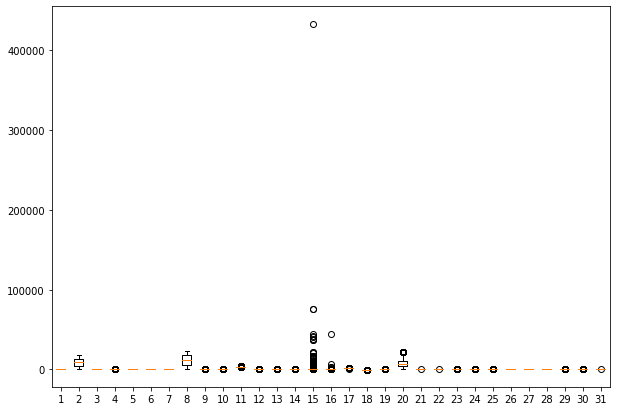

In [24]:
# Visualize the distribution before performing scaling
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_imputed_label_ss)
plt.show()

In [25]:
sc = StandardScaler()
X_imputed_label_ss = sc.fit_transform(X_imputed_label_ss)

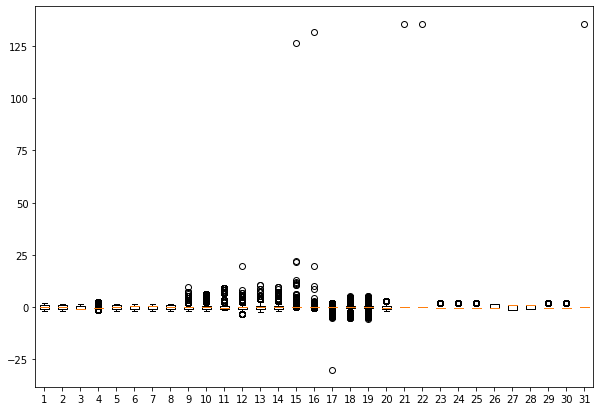

In [26]:
# Visualize the distribution after performing scaling
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_imputed_label_ss)
plt.show()

In [27]:
X_train_SS, X_valid_SS, y_train_SS, y_valid_SS = train_test_split(X_imputed_label_ss, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

print("MAE after Standard Scaling:")
print(score_dataset(X_train_SS, X_valid_SS, y_train_SS, y_valid_SS))

MAE after Standard Scaling:
427452.8425777484


#### Min-Max Scaling

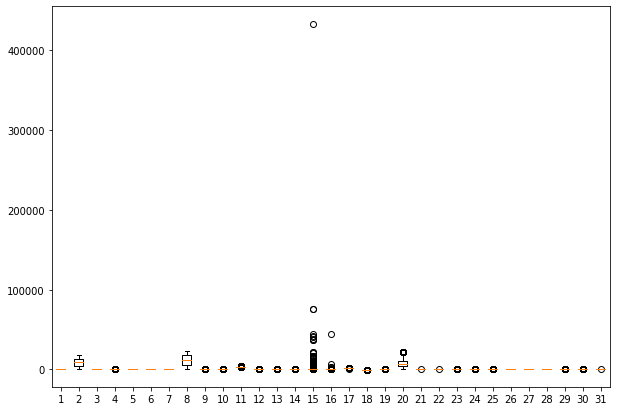

In [55]:
# Visualize the distribution before performing scaling
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_imputed_label_mm)
plt.show()

In [56]:
norm = MinMaxScaler()
X_imputed_label_mm = norm.fit_transform(X_imputed_label_mm)

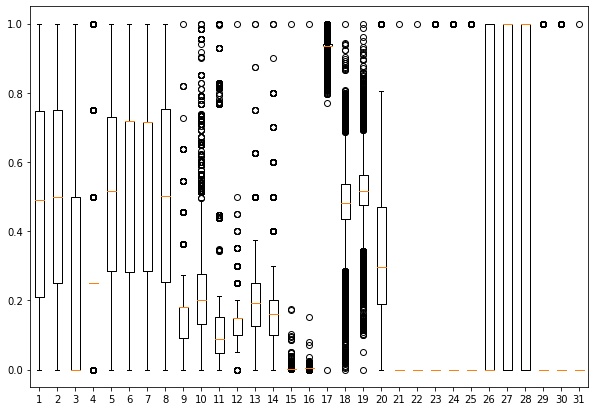

In [57]:
# Visualize the distribution after performing scaling
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_imputed_label_mm)
plt.show()

In [58]:
X_train_MM, X_valid_MM, y_train_MM, y_valid_MM = train_test_split(X_imputed_label_mm, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

print("MAE after Min-Max Scaling:")
print(score_dataset(X_train_MM, X_valid_MM, y_train_MM, y_valid_MM))

MAE after Min-Max Scaling:
426667.3557119982


#### Take-aways - [Reference Link](https://www.section.io/engineering-education/feature-scaling-effects-machine-learning-model/)
**Choosing between the two scaling techniques:**
    
When it comes to choosing between normalization and standardization, it depends on:

1. The dataset property- normalization is preferred if your dataset doesn’t follow Gaussian Distribution.

2. Performance - you should try to use both and compare which works better for your model. As for us, Standard Scaling gives better results.


**Exceptions:**

1. Feature scaling is not required when using tree-based algorithms, i.e., Random Forest and Decision Tree.

2. When using standardization with a dataset that contains categorical data that is one-hot encoded, you should exclude the encoded columns. Not doing so might lead to your dataset losing its categorical property.

#### Additional Information:

Along with Min-Max Scaler and Standard Scaler, there are 5 more Standardization and Normalization approaches.

[Reference Link](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

[Reference Link](https://www.quora.com/Does-feature-scaling-ever-affect-the-the-decision-making-process-in-feature-selection)

They are:
1. Max Abs Scaler
2. Robust Scaler
3. Qunatile Transformer Scaler
4. Power Transformer Scaler
5. Unit Vector Scaler
